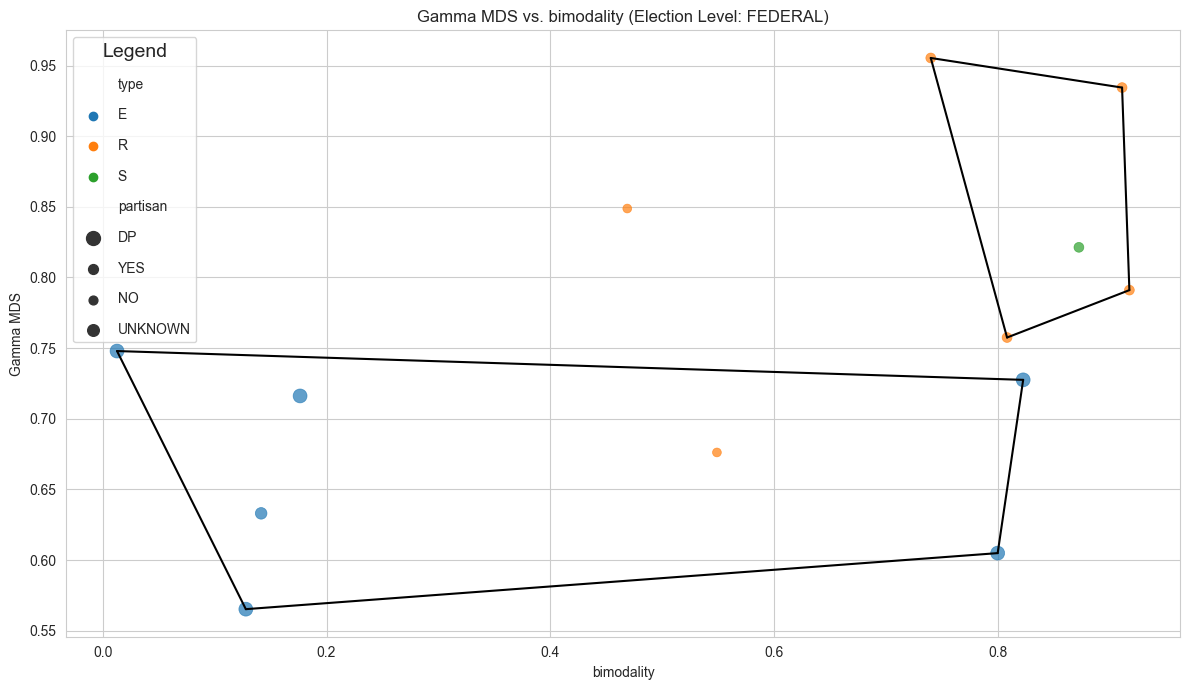

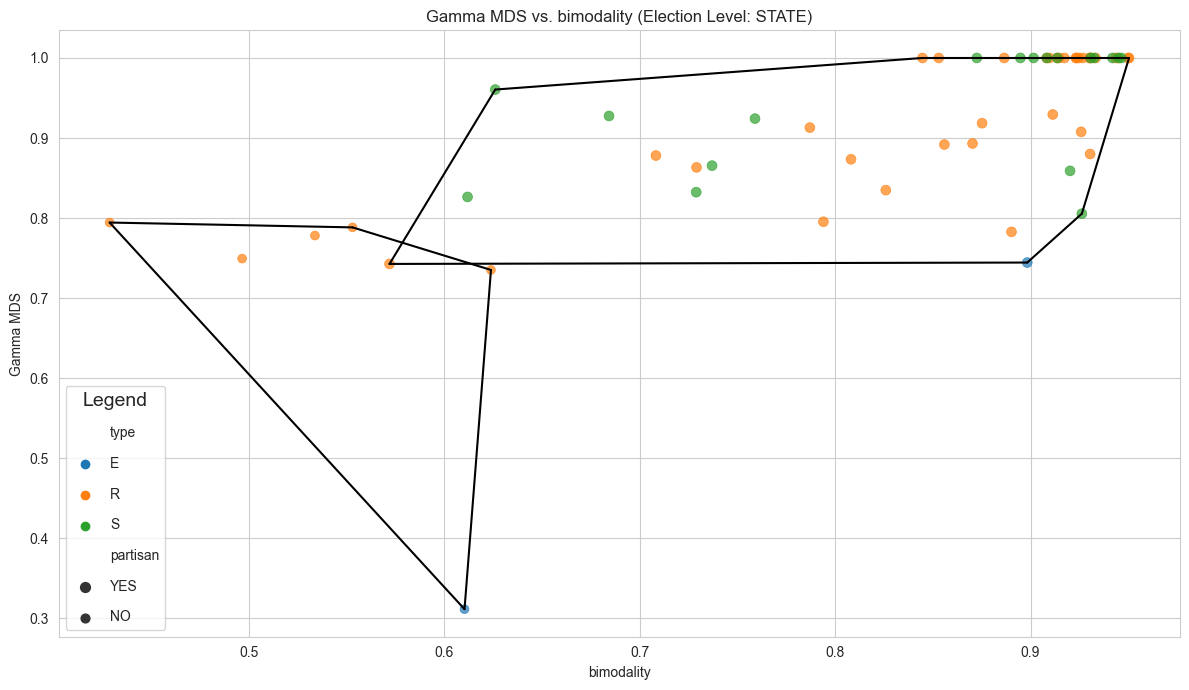

/var/folders/g2/25z774tn0599smwks8_v_k200000gp/T/ipykernel_47100/2798269415.py:55: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=subset_data, x=measure, y='gamma mds', hue='type',
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


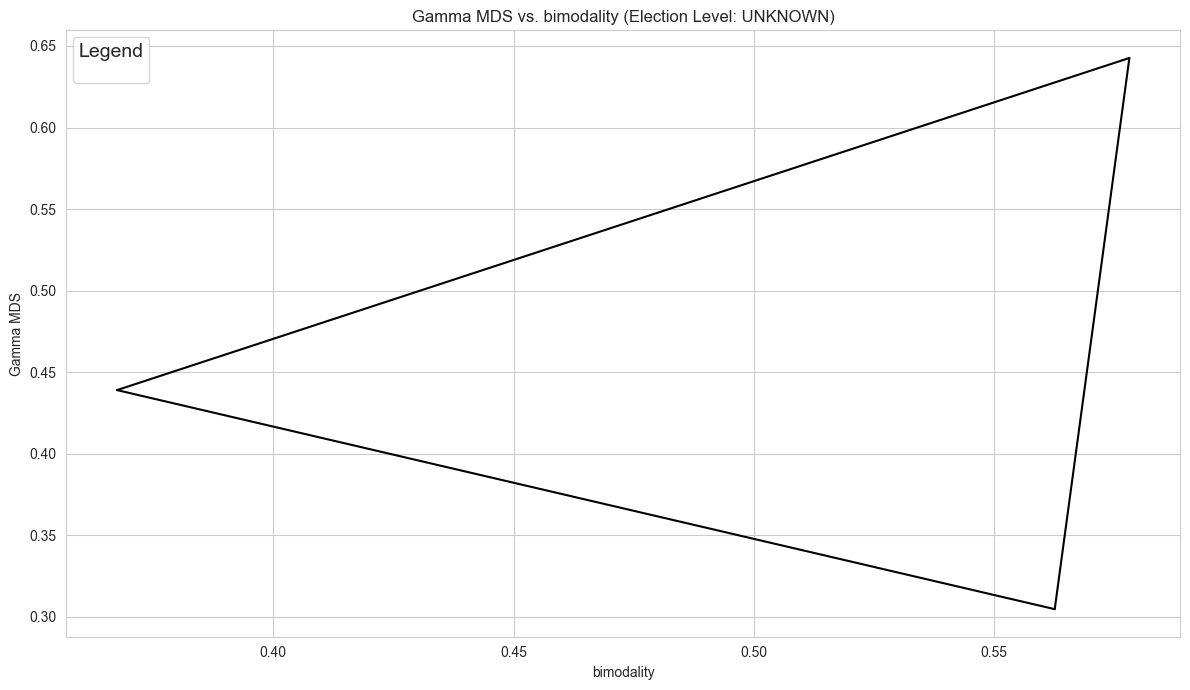

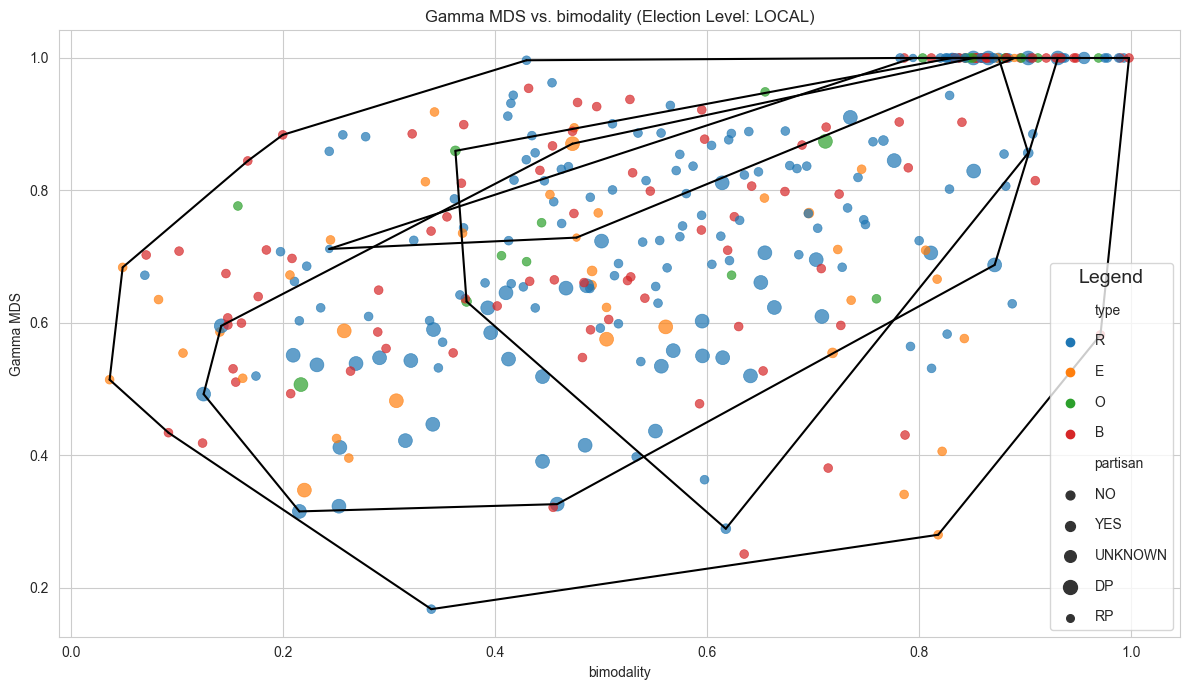

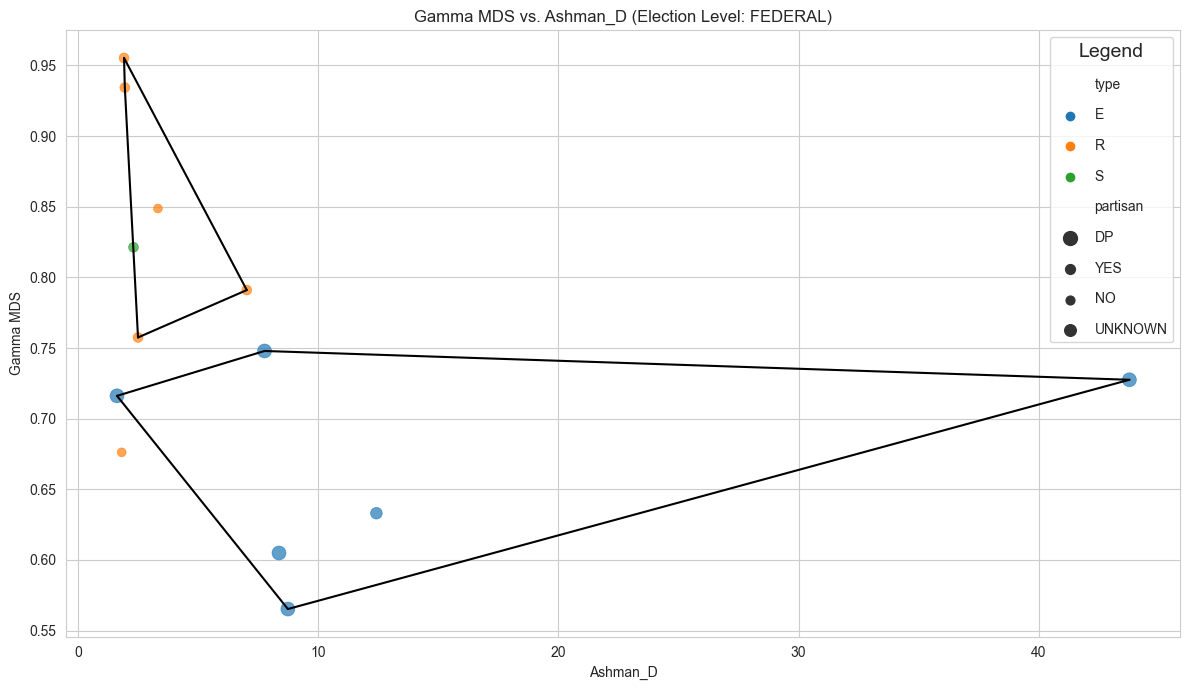

ValueError: Points cannot contain NaN

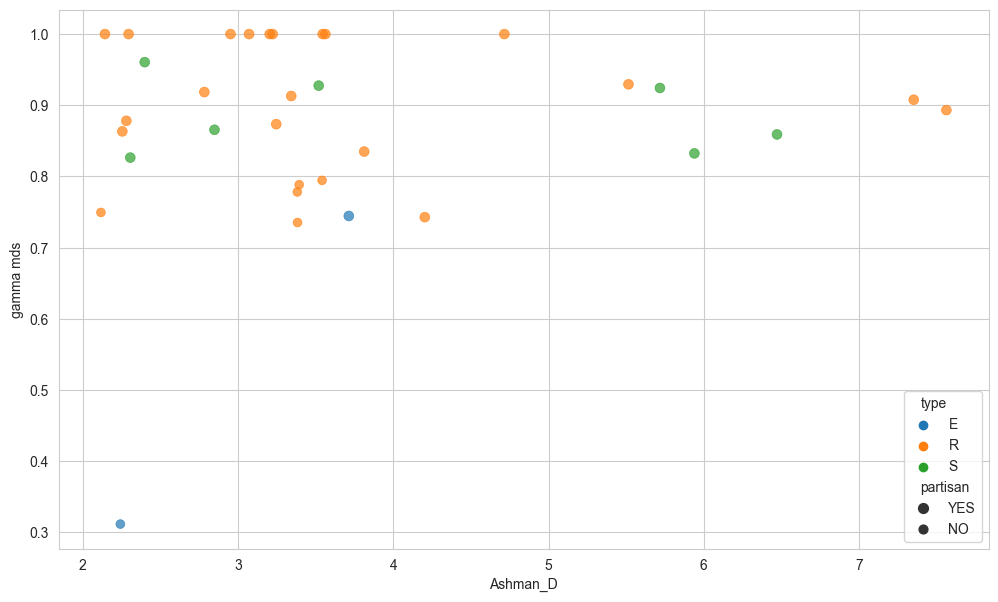

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import ConvexHull

# Load the data
election_data = pd.read_csv('election_table.csv')

# Handle missing values
election_data['level'].fillna('UNKNOWN', inplace=True)
election_data['partisan'].fillna('UNKNOWN', inplace=True)

# Define shape and size dictionaries
level_shapes = {
    'FEDERAL': 'o', 
    'STATE': 's',
    'LOCAL': '^',
    'UNKNOWN': 'X'
}

partisan_sizes = {
    'DP': 100,
    'YES': 50,
    'NO': 40,
    'RP': 30,
    'UNKNOWN': 70
}

# List of bimodality measures to plot
bimodality_measures = ['bimodality', 'Ashman_D', 'Sarle_coefficient', 'Hartigan_Dip']

# Get unique levels
unique_levels = election_data['level'].unique()

# Set up the style for the plots
sns.set_style("whitegrid")

# Function to plot convex hull
def plot_convex_hull(data, measure):
    for partisan in data['partisan'].unique():
        subset = data[data['partisan'] == partisan]
        
        # Check if there are enough points to create a convex hull
        if subset.shape[0] >= 3:
            hull = ConvexHull(subset[[measure, 'gamma mds']].values)
            for simplex in hull.simplices:
                plt.plot(subset[measure].iloc[simplex], subset['gamma mds'].iloc[simplex], 'k-')

# Iterate over each bimodality measure and each election level to create the plots
for measure in bimodality_measures:
    for level in unique_levels:
        subset_data = election_data[election_data['level'] == level]
        
        plt.figure(figsize=(12, 7))
        sns.scatterplot(data=subset_data, x=measure, y='gamma mds', hue='type', 
                        palette='tab10', size=subset_data['partisan'],
                        sizes=partisan_sizes, alpha=0.7, edgecolor=None)
        
        # Plot convex hulls
        plot_convex_hull(subset_data, measure)
        
        # Set plot labels and title
        plt.title(f'Gamma MDS vs. {measure} (Election Level: {level})')
        plt.xlabel(measure)
        plt.ylabel('Gamma MDS')
        plt.legend(title='Legend', title_fontsize='14', labelspacing=1.2)
        plt.tight_layout()
        plt.show()